In [11]:
from main import setup
import yaml
import pathlib
import torch
import matplotlib.pyplot as plt

In [12]:
x = torch.tensor(0.0, requires_grad=True)


In [14]:
y = x
y = y.detach()

In [17]:
x.requires_grad, y.requires_grad

(True, False)

In [8]:
def load(path):
    hparam = path + "/hparam.yaml"
    config = yaml.safe_load(open(hparam))
    config["loss_fn"] = "reverse-kl"

    sampler, optim, scheduler, _ = setup(config)

    progress = torch.load(f"{path}/progress_9000.pth")
    progress["sampler"]["ln_z"] = torch.tensor(0.0)
    sampler.load_state_dict(progress["sampler"])
    # optim.load_state_dict(progress["optim"])

    return config, sampler


tensor(-0.3565, device='cuda:0')
tensor(-0.3802, device='cuda:0')


/home/brianlck/.local/lib/python3.10/site-packages/torch/_inductor/cudagraph_trees.py:2069: UserWarning: Unable to hit fast path of CUDAGraphs because of pending, uninvoked backwards. Consider running with torch.no_grad() or using torch.compiler.cudagraph_mark_step_begin() before each model invocation
  warnings.warn(


tensor(-0.4715, device='cuda:0')
tensor(-0.2942, device='cuda:0')
tensor(-0.3724, device='cuda:0')
tensor(-0.3455, device='cuda:0')
tensor(-0.2403, device='cuda:0')
tensor(-0.3710, device='cuda:0')
tensor(-0.3686, device='cuda:0')
tensor(-0.2492, device='cuda:0')
tensor(-0.3449, device='cuda:0') tensor(0.0684, device='cuda:0')
tensor(-0.2492, device='cuda:0') tensor(0.9497, device='cuda:0') tensor(-0.7050, device='cuda:0')
tensor(-0.7050, device='cuda:0')


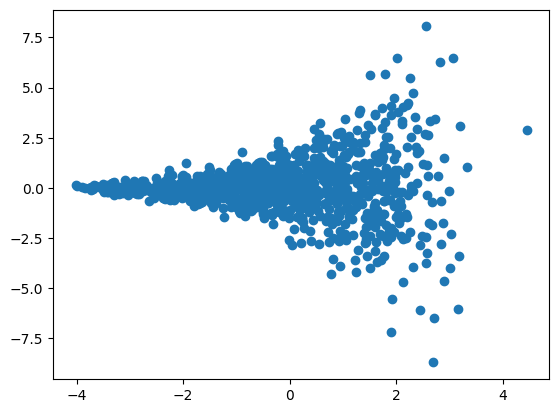

In [9]:
torch.set_default_device('cuda')


config, sampler,= load("/home/brianlck/code/code/dissertation/logs/funnel/24-01-23-20:30:44")


with torch.no_grad():
    sampler.eval()

    g = []
    for i in range(10):
        samples = sampler.sample(1000, repel=False, repel_percentage=1.0)
        samples = sampler.evaluate(samples)
        print(samples.ln_z)
        g.append(samples.ln_z)

    print(torch.tensor(g).mean(), torch.tensor(g).std())

    print(samples.ln_z, samples.ln_rnd.std(), samples.elbo)
    plt.scatter(samples.particles[:, 0].detach().cpu().numpy(), samples.particles[:, 2].detach().cpu().numpy())
    print(samples.ln_rnd.mean())

In [10]:
print(samples.elbo)

tensor(-0.7050, device='cuda:0')


In [8]:
from cmcd.loss_fn import SubtrajectoryBalance


loss_fn = SubtrajectoryBalance(config['n_bridges'])

torch.Size([65, 65])


In [34]:
torch.set_default_device('cuda')


print(ln_ratio[:, 0])

ln_ratio = torch.vstack([torch.zeros(1, samples.ln_ratio.shape[1]), -samples.ln_ratio.cumsum(dim=0)])
betas = sampler.betas()
ln_pi = samples.ln_pi + ((1.0 - betas) * sampler.ln_z).view(-1, 1)

print(ln_pi)
print(ln_ratio[:, 0])

A1 = ln_pi.unsqueeze(1) - ln_pi.unsqueeze(2)  # (b, T+1, T+1)
A2 = ln_ratio[:, :, None] - ln_ratio[:, None, :] + A1  # (b, T+1, T+1)
A2 = (A2 / 10.0).pow(2).mean(dim=0)  # (T+1, T+1)

loss = torch.triu(A2 * self.coef, diagonal=1).sum()


tensor([ 0.0000, -0.1209,  0.1770, -0.0548,  0.2354, -0.0759, -0.0618,  0.2312,
        -0.1184, -0.1871,  0.4037,  0.7514,  0.1033, -0.0326,  0.0040, -0.1175,
        -0.1049, -0.1159,  0.4825, -0.0551,  0.0205, -0.0802, -0.1890,  0.3308,
        -0.0755,  0.3434, -0.0802,  0.0327,  0.0123, -0.2972, -0.0754,  0.0545,
        -0.1272, -0.1787,  0.1240,  0.2672, -0.1725, -0.1965, -0.0285, -0.4669,
         0.2591, -0.0767,  0.0848,  0.0090, -0.0103,  0.0020, -0.0350, -0.1504,
         0.5485,  0.2891, -0.1962, -0.0397,  0.1157,  0.3668, -0.0412,  0.0338,
        -0.0931, -0.0788, -0.0112, -0.3609, -0.3188, -0.4219, -0.0567, -0.5582,
         0.2962], device='cuda:0', grad_fn=<SelectBackward0>)
tensor([[-4.7553, -3.3975, -7.5043,  ..., -3.3539, -3.9487, -3.4751],
        [-4.8309, -3.5107, -7.7035,  ..., -3.3876, -3.8588, -3.4773],
        [-4.7374, -3.5963, -7.6924,  ..., -3.4426, -3.8255, -3.5028],
        ...,
        [-4.2984, -3.2995, -2.2612,  ..., -3.3627, -2.2510, -2.2636],
     

NameError: name 'self' is not defined

In [28]:
from cmcd.densities import GMM
import random
import numpy as np

torch.manual_seed(5)
random.seed(5)
np.random.seed(5)

dim = 2
n_mixes = 40
loc_scaling = 40.0  # scale of the problem (changes how far apart the modes of each Guassian component will be)
log_var_scaling = 1.0  # variance of each Gaussian
gmm40 = GMM(
    dim=dim,
    n_mixes=n_mixes,
    loc_scaling=loc_scaling,
    log_var_scaling=log_var_scaling,
    use_gpu=True,
    true_expectation_estimation_n_samples=int(1e5),
)

In [22]:
print(samples.trajectory[0].device)

cuda:0


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from cmcd.densities import GaussianMixture
import torch

torch.set_default_device('cpu')

for i in range(65):

    n = 100
    b = 5
    x = np.linspace(-b, b, n)
    y = np.linspace(-b, b, n)

    X, Y = np.meshgrid(x, y)
    coords = np.vstack([X.ravel(), Y.ravel()]).T
    coords = torch.tensor(coords).float()

    gmm = GaussianMixture()

    density = gmm.log_density(coords).exp().reshape(n, n).T.cpu()

    cum = (density.sum() * (2 * b / n) * (2 * b / n)).log()

    
    n = 10
    b = 5
    x = np.linspace(-b, b, n)
    y = np.linspace(-b, b, n)

    
    kX, kY = np.meshgrid(x, y)
    coords = np.vstack([kX.ravel(), kY.ravel()]).T
    coords = torch.tensor(coords).float()

    # print(cum)
    gg = (sampler.drift(coords, i)).cpu().detach()
    levels = np.linspace(density.min(), density.max() + 10, 40)

    plt.contour(X, Y, density)
    plt.colorbar()

    plt.scatter(samples.trajectory[i][:, 0].detach().cpu().numpy(), samples.trajectory[i][:, 1].detach().cpu().numpy())
    plt.quiver(kX, kY, gg[:, 0], gg[:, 1])
    plt.show()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

-6.8658724


(array([  3.,   4.,  10.,  46., 158., 519., 885., 308.,  55.,  12.]),
 array([-6.86587238, -5.85950947, -4.85314703, -3.84678411, -2.84042144,
        -1.83405876, -0.82769603,  0.17866668,  1.18502939,  2.19139218,
         3.19775486]),
 <BarContainer object of 10 artists>)

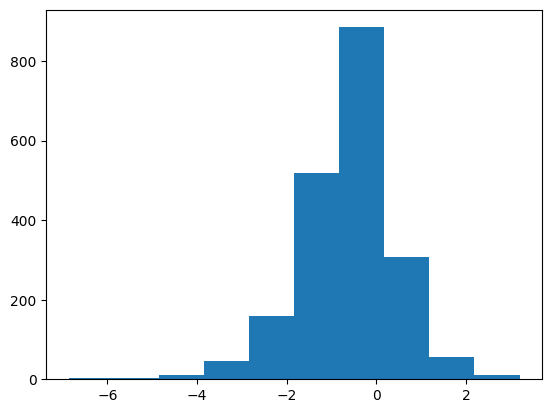

In [25]:
ln_z = samples.ln_rnd.detach().cpu()

print(ln_z.numpy().min())

plt.hist(ln_z.numpy())


In [1]:
config, sampler, optim = load("/home/brianlck/code/code/dissertation/logs/dw/23-12-25-22:14:27")
samples = sampler.sample(500, loss_fn="mean", correct=False, repel=True)
config['loss_fn'], config['repel']



NameError: name 'load' is not defined

In [6]:
config, sampler, optim = load("/home/brianlck/code/code/dissertation/logs/dw/23-12-26-05:53:23")
samples = sampler.sample(500, loss_fn="mean", correct=False, repel=False)
config['loss_fn'], config['repel']
samples.ln_z



FileNotFoundError: [Errno 2] No such file or directory: '/home/brianlck/code/code/dissertation/logs/dw/23-12-26-05:53:23/progress_9000.pth'

In [5]:
config, sampler, optim = load("/home/brianlck/code/code/dissertation/logs/dw/23-12-29-15:31:34")
samples = sampler.sample(500, loss_fn="mean", correct=False, repel=False)
config['loss_fn'], config['repel']
samples.ln_z


FileNotFoundError: [Errno 2] No such file or directory: '/home/brianlck/code/code/dissertation/logs/dw/23-12-29-15:31:34/progress_9000.pth'

In [1]:
config, sampler, optim = load("/home/brianlck/code/code/dissertation/logs/dw/24-01-09-15:59:30")
samples2 = sampler.sample(500, loss_fn="mean", correct=False, repel=False)
config['loss_fn'], config['repel']



NameError: name 'load' is not defined

tensor(-49.1208, device='cuda:0', grad_fn=<SubBackward0>) tensor(63.3318, device='cuda:0', grad_fn=<MeanBackward0>)


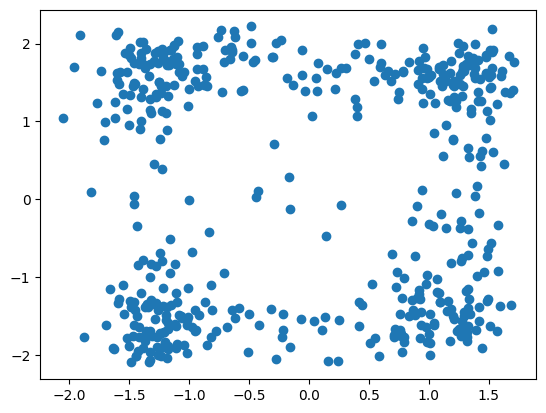

In [6]:
samples = sampler.sample(500, loss_fn="mean", correct=False, repel=False)

print(samples.ln_z, samples.loss)

plt.scatter(samples.particles[:, 1].detach().cpu().numpy(), samples.particles[:, 3].detach().cpu().numpy())

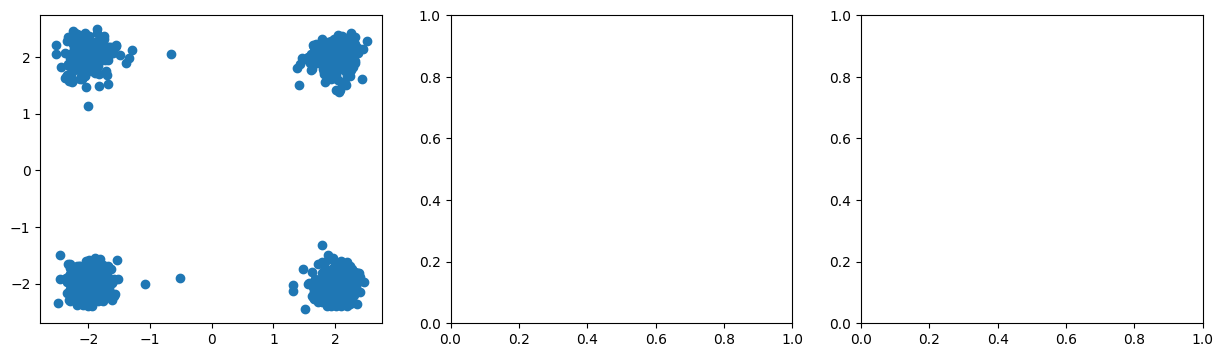

KeyboardInterrupt: 

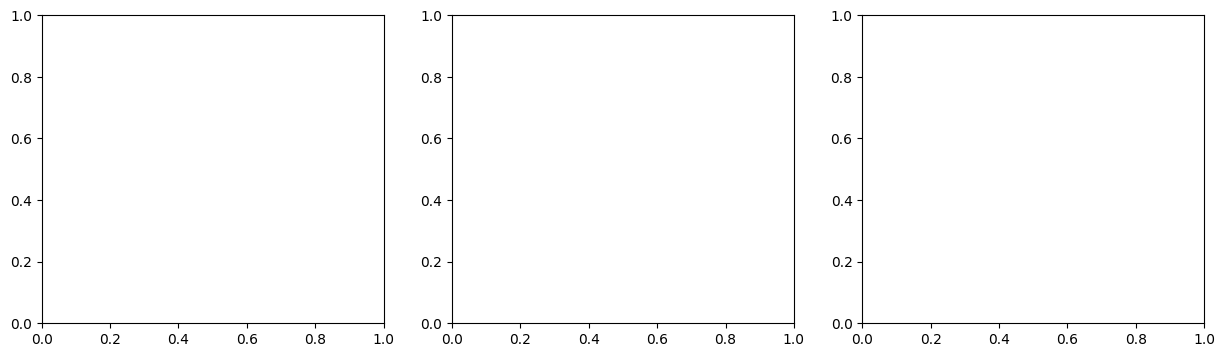

In [16]:
for i in range(50):
    for j in range(50):
        if i != j:
            fig = plt.figure(3, figsize=(15,4))
            subfig = fig.subplots(1, 3)
            subfig[0].scatter(samples.particles[:, i].detach().cpu().numpy(), samples.particles[:, j].detach().cpu().numpy())
            # subfig[1].scatter(samples2.particles[:, i].detach().cpu().numpy(), samples2.particles[:, j].detach().cpu().numpy())
            plt.show()